**PANDAS**

In [1]:
import pandas as pd

In [2]:
df_A=pd.DataFrame({
        'Temperature':[20,30,40,50,60],
        'Index':['Day1','Day2','Day3','Day4','Day5']
        })
df_B=pd.DataFrame({
        'Humidity':[30,45,50,65,40],
        'Index':['Day1','Day2','Day3','Day4','Day5']
        })
joined_df=pd.merge(df_A,df_B,on='Index')
joined_df

,Temperature,Index,Humidity
0,20,Day1,30
1,30,Day2,45
2,40,Day3,50
3,50,Day4,65
4,60,Day5,40


In [3]:
wide_df=pd.DataFrame({
    'Name':['Ram','Shyam'],
    'Science':[85,60],
    'math':[70,80],
    'English':[60,70]
})
print(wide_df)

    Name  Science  math  English
0    Ram       85    70       60
1  Shyam       60    80       70


In [ ]:
long_df=pd.melt(
    frame=wide_df,
    id_vars=['Name'],
    var_name='Subject',
    value_name='Marks',
    

)
print(long_df)

    Name  Subject  Marks
0    Ram  Science     85
1  Shyam  Science     60
2    Ram     math     70
3  Shyam     math     80
4    Ram  English     60
5  Shyam  English     70


In [ ]:
new_df=long_df.pivot(
    index='Name',
    columns='Subject',
    values='Marks'
)
print(new_df)

Subject  English  Science  math
Name                           
Ram           60       85    70
Shyam         70       60    80


In [ ]:
stacked_df=long_df.stack()#convert into series dataframe:2d series:1d
print(stacked_df)

0  Name           Ram
   Subject    Science
   Marks           85
1  Name         Shyam
   Subject    Science
   Marks           60
2  Name           Ram
   Subject       math
   Marks           70
3  Name         Shyam
   Subject       math
   Marks           80
4  Name           Ram
   Subject    English
   Marks           60
5  Name         Shyam
   Subject    English
   Marks           70
dtype: object


In [ ]:
unstacked_df=stacked_df.unstack()
print(unstacked_df)

    Name  Subject Marks
0    Ram  Science    85
1  Shyam  Science    60
2    Ram     math    70
3  Shyam     math    80
4    Ram  English    60
5  Shyam  English    70


In [ ]:
pivot_table_df=pd.pivot_table(
    data=long_df,
 values='Marks',
 index='Name',
 columns='Subject',
 aggfunc='median'
)
print(pivot_table_df)

Subject  English  Science  math
Name                           
Ram         60.0     85.0  70.0
Shyam       70.0     60.0  80.0


In [ ]:
data={
    'Roll':[1,2,3,4,5],
    'Name':['Ayush','Syham','','ram',''],
    'Age':[20,30,25,33,''],
    'Address':['A','B','C','D','']
}
df=pd.DataFrame(data)
df.to_csv("missing.csv",index=False)

In [ ]:
df=pd.read_csv("missing.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     5 non-null      int64  
 1   Name     3 non-null      object 
 2   Age      4 non-null      float64
 3   Address  4 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


,Roll,Name,Age,Address
0,1,Ayush,20.0,A
1,2,Syham,30.0,B
2,3,NaN,25.0,C
3,4,ram,33.0,D
4,5,NaN,NaN,NaN


In [ ]:
df.shape

(5, 4)

In [ ]:
df_new=df.dropna()
df.head()

,Roll,Name,Age,Address
0,1,Ayush,20.0,A
1,2,Syham,30.0,B
2,3,Unknown,25.0,C
3,4,ram,33.0,D


In [ ]:
df.dropna(axis=1)
df.head()

,Roll,Name,Age,Address
0,1,Ayush,20.0,A
1,2,Syham,30.0,B
2,3,Unknown,25.0,C
3,4,ram,33.0,D
4,5,Unknown,NaN,NaN


In [ ]:
#fill missing values in name column with the unknown
df['Name']=df['Name'].fillna('Unknown')
df.head()

,Roll,Name,Age,Address
0,1,Ayush,20.0,A
1,2,Syham,30.0,B
2,3,Unknown,25.0,C
3,4,ram,33.0,D
4,5,Unknown,NaN,NaN


In [ ]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age,inplace=True)
print(df)

   Roll     Name   Age Address
0     1    Ayush  20.0       A
1     2    Syham  30.0       B
2     3  Unknown  25.0       C
3     4      ram  33.0       D
4     5  Unknown  27.0     NaN


C:\Users\Acer\AppData\Local\Temp\ipykernel_14708\1851870428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age,inplace=True)


In [ ]:
df['Address']=df['Address'].fillna("Dharan",inplace=True)

In [ ]:
df.to_csv("NEw.csv",index=False)

In [ ]:
import pandas as pd
df=pd.DataFrame({
    'EID':[101,102,103,104],
    'Name':['Ram','Angel','Aakash','Abisek'],
    'Level':['Junior','Senior','Mid','junior']
})
print(df)
df.dtypes

   EID    Name   Level
0  101     Ram  Junior
1  102   Angel  Senior
2  103  Aakash     Mid
3  104  Abisek  junior


EID       int64
Name     object
Level    object
dtype: object

In [ ]:
df['Level']=df['Level'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   EID     4 non-null      int64   
 1   Name    4 non-null      object  
 2   Level   4 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 404.0+ bytes


In [ ]:
df.dtypes

EID         int64
Name       object
Level    category
dtype: object

In [ ]:
df['Level_codes']=df['Level'].cat.codes
df.head()

,EID,Name,Level,Level_codes
0,101,Ram,Junior,0
1,102,Angel,Senior,2
2,103,Aakash,Mid,1
3,104,Abisek,junior,3


In [ ]:
encoded_df=pd.get_dummies(df['Level'],prefix='Lev')
encoded_df.head()

,Lev_Junior,Lev_Mid,Lev_Senior,Lev_junior
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True


In [ ]:
df=pd.DataFrame({
    'Date':['2025-01-05','2025-01-12','2025-01-14','2025-01-13'],
    'Sales':[101,105,106,201]
})
print(df.dtypes)

Date     object
Sales     int64
dtype: object


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
print(df.dtypes)

Date     datetime64[ns]
Sales             int64
dtype: object


In [ ]:
df=df.set_index('Date')
print(df.head())

            Sales
Date             
2025-01-05    101
2025-01-12    105
2025-01-14    106
2025-01-13    201


In [ ]:
df['Year']=df.index.year
df['Month']=df.index.month
df['Day']=df.index.day
df['Day_Name']=df.index.day_name()
df['Month_Name']=df.index.month_name()
print(df)

            Sales  Year  Month  Day Day_Name Month_Name
Date                                                   
2025-01-05    101  2025      1    5   Sunday    January
2025-01-12    105  2025      1   12   Sunday    January
2025-01-14    106  2025      1   14  Tuesday    January
2025-01-13    201  2025      1   13   Monday    January


In [ ]:
df.loc['2025-01']

In [ ]:
import numpy as np
x=np.array([1000,22,333,444,55,66,77,88])
x_transformed=np.log1p(x)
print(x_transformed)

[6.90875478 3.13549422 5.81114099 6.09807428 4.02535169 4.20469262
 4.35670883 4.48863637]


(array([1., 0., 2., 2., 0., 0., 0., 2., 0., 1.]),
 array([3.13549422, 3.51282027, 3.89014633, 4.26747238, 4.64479844,
        5.0221245 , 5.39945055, 5.77677661, 6.15410267, 6.53142872,
        6.90875478]),
 <BarContainer object of 10 artists>)

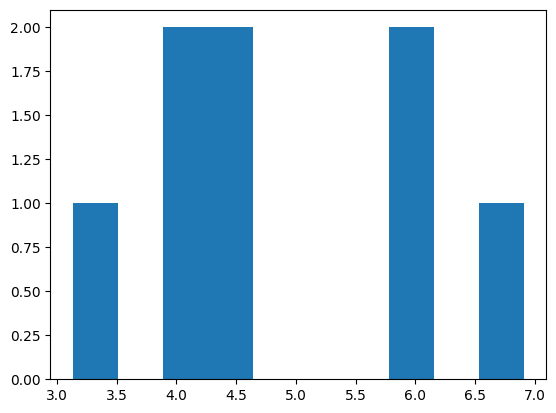

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x_transformed)